In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
data=pd.read_excel('Data_Train.xlsx')
data.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
data.shape

(10683, 11)

In [4]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Checking for the null values

In [11]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Handling the null values

In [12]:
data['Route']=data['Route'].fillna(data['Route'].mode()[0])

In [13]:
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

### Checking the datatypes of the columns

In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Checking for empty values

In [16]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Empty values in column 
    count = (column == ' ').sum()
    print('Count of empty values in column ', column_name, ' is : ', count)

Count of empty values in column  Airline  is :  0
Count of empty values in column  Date_of_Journey  is :  0
Count of empty values in column  Source  is :  0
Count of empty values in column  Destination  is :  0
Count of empty values in column  Route  is :  0
Count of empty values in column  Dep_Time  is :  0
Count of empty values in column  Arrival_Time  is :  0
Count of empty values in column  Duration  is :  0
Count of empty values in column  Total_Stops  is :  0
Count of empty values in column  Additional_Info  is :  0
Count of empty values in column  Price  is :  0


### Checking for 0 values

In [17]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of 0 values in column 
    count = (column == 0).sum()
    print('Count of 0 values in column ', column_name, ' is : ', count)

Count of 0 values in column  Airline  is :  0
Count of 0 values in column  Date_of_Journey  is :  0
Count of 0 values in column  Source  is :  0
Count of 0 values in column  Destination  is :  0
Count of 0 values in column  Route  is :  0
Count of 0 values in column  Dep_Time  is :  0
Count of 0 values in column  Arrival_Time  is :  0
Count of 0 values in column  Duration  is :  0
Count of 0 values in column  Total_Stops  is :  0
Count of 0 values in column  Additional_Info  is :  0
Count of 0 values in column  Price  is :  0


### Visualization of the dataset

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


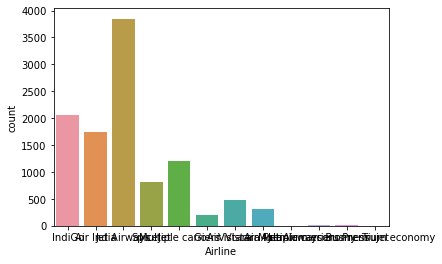

In [21]:
ax=sns.countplot(x='Airline',data=data)
print(data['Airline'].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


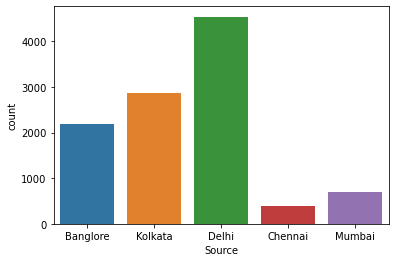

In [24]:
ax=sns.countplot(x='Source',data=data)
print(data['Source'].value_counts())

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


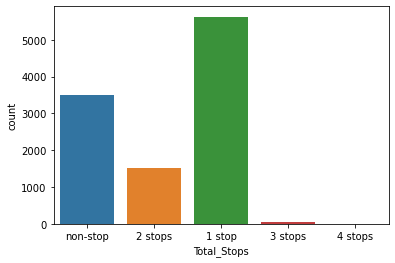

In [25]:
ax=sns.countplot(x='Total_Stops',data=data)
print(data['Total_Stops'].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


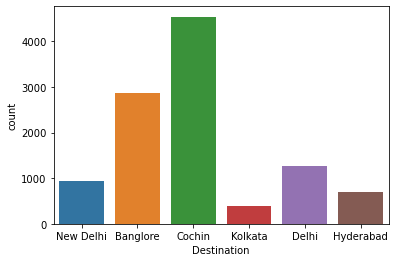

In [26]:
ax=sns.countplot(x='Destination',data=data)
print(data['Destination'].value_counts())

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → VTZ → BLR                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → JLR → HYD                   1
CCU → IXB → DEL → BLR             1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 128, dtype: int64


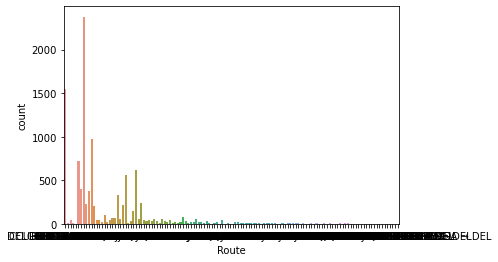

In [27]:
ax=sns.countplot(x='Route',data=data)
print(data['Route'].value_counts())

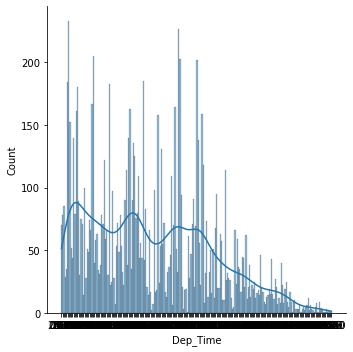

In [29]:
sns.displot(data['Dep_Time'],kde=True)

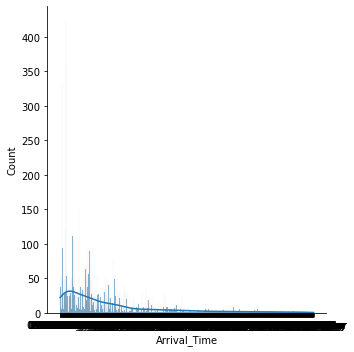

In [30]:
sns.displot(data['Arrival_Time'],kde=True)

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


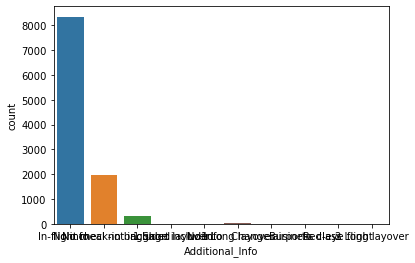

In [31]:
ax=sns.countplot(x='Additional_Info',data=data)
print(data['Additional_Info'].value_counts())

### Encoding the dataset

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [34]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [35]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,211.0,233.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,31.0,906.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,70.0,413.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,164.0,1324.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,149.0,1237.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,183.0,1259.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,193.0,1305.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,58.0,824.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,92.0,938.0,238.0,4.0,8.0,12648


### Checking outliers using boxplot

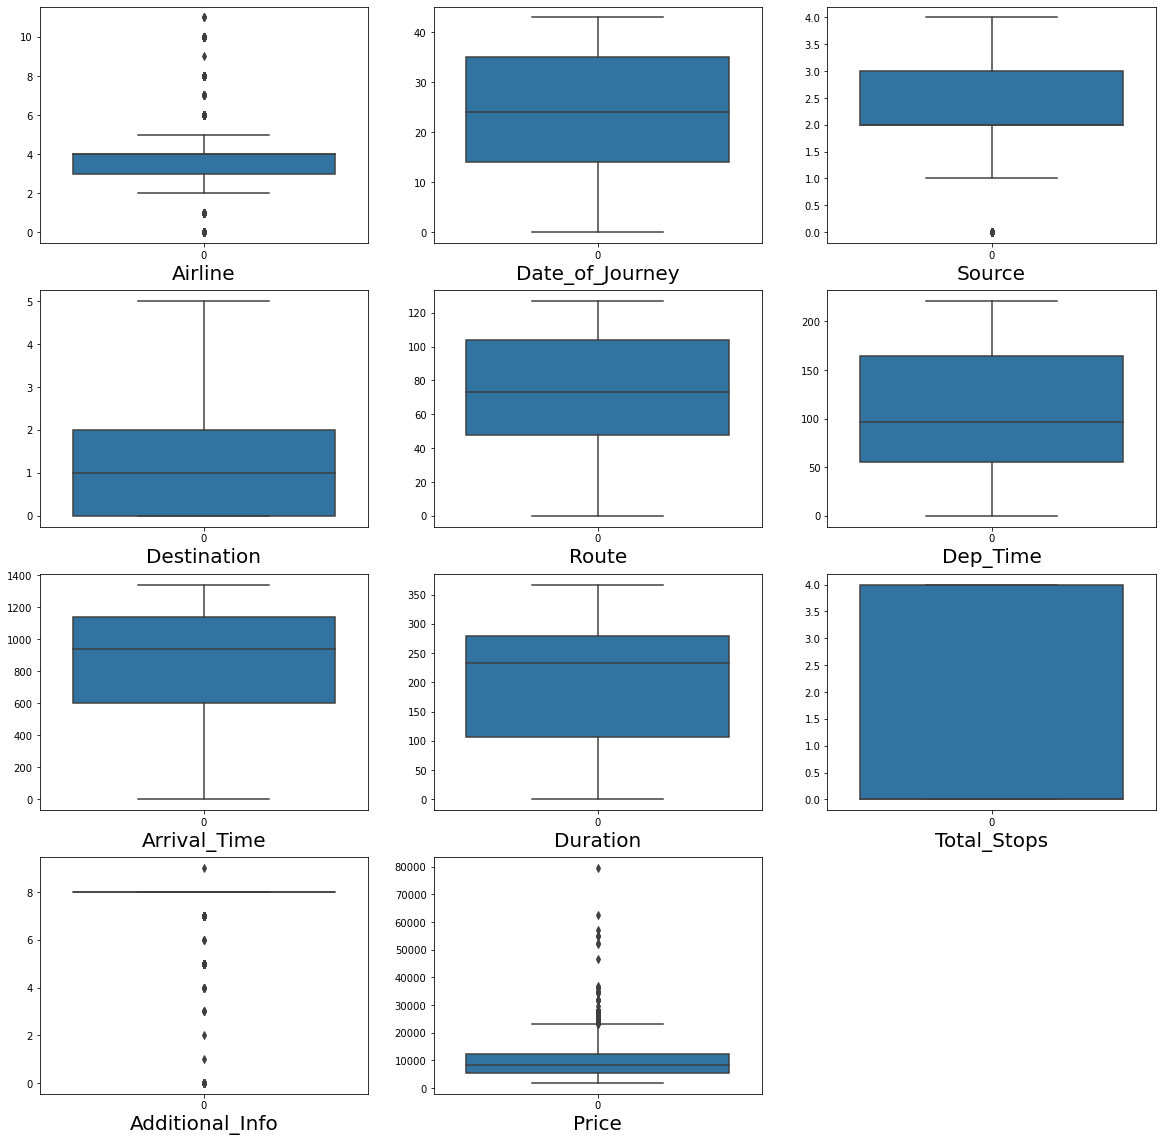

In [37]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We are not removing the outliers since these are the categorical columns in which outliers present

### Checking correlation

In [38]:
data.corr()['Price']

Airline           -0.039520
Date_of_Journey   -0.036942
Source             0.015998
Destination       -0.071112
Route              0.164118
Dep_Time           0.002949
Arrival_Time       0.027377
Duration          -0.144270
Total_Stops       -0.571174
Additional_Info   -0.065478
Price              1.000000
Name: Price, dtype: float64

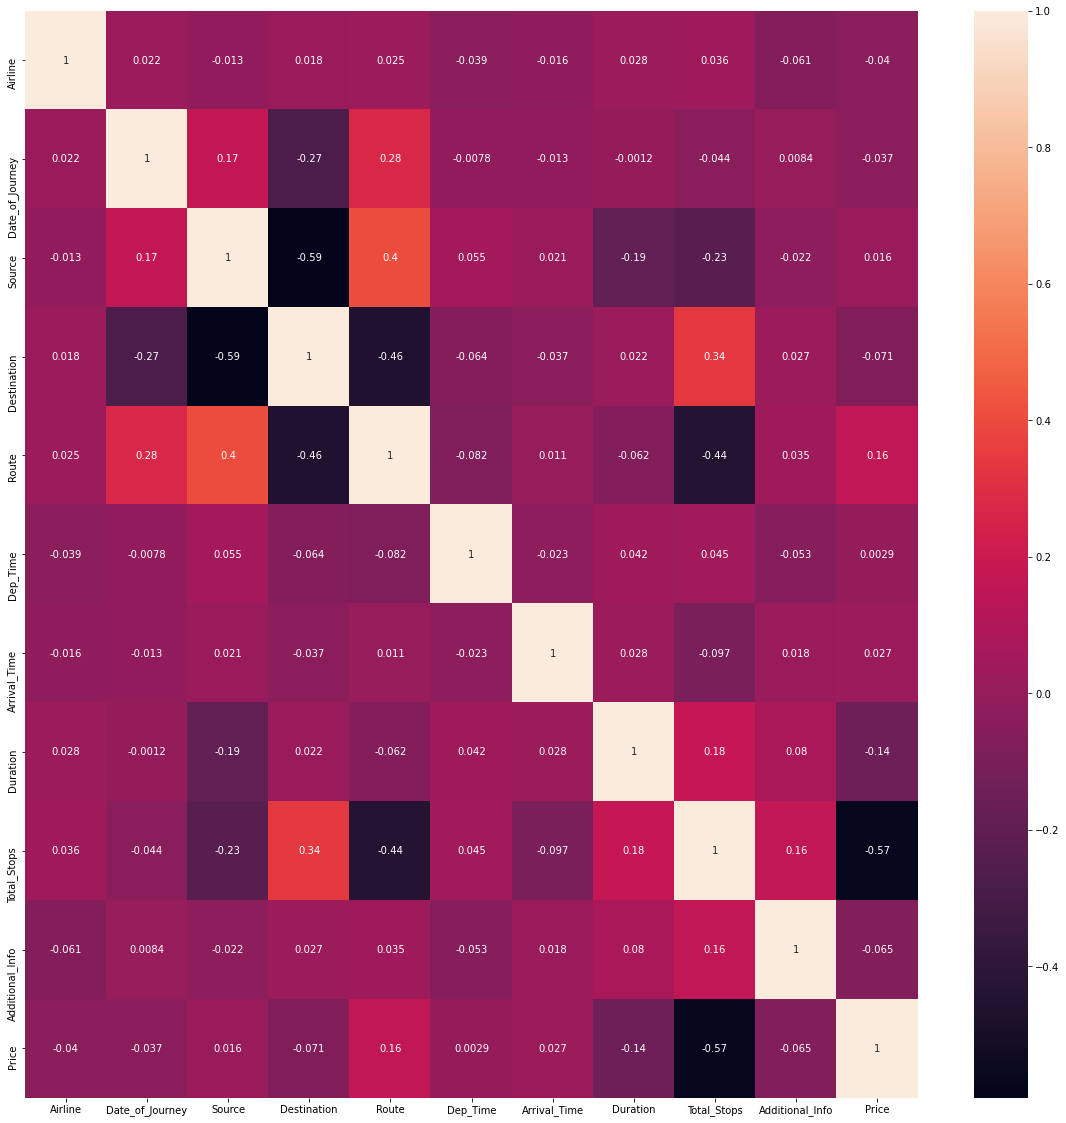

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Checking the columns which are positively and negatively correlated with the target variable

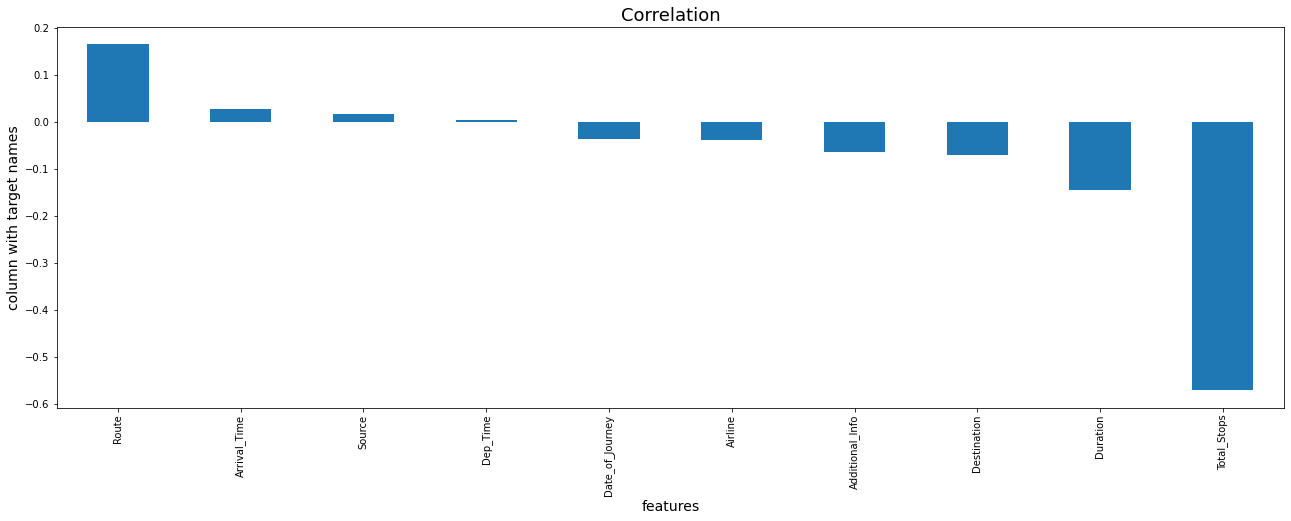

In [43]:
plt.figure(figsize=(22,7))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Removing the columns which has very less relation with the target variable

In [39]:
data_new=data.drop(columns=['Dep_Time','Arrival_Time'])

In [40]:
data_new

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,3.0,24.0,0.0,5.0,18.0,240.0,4.0,8.0,3897
1,1.0,6.0,3.0,0.0,84.0,336.0,1.0,8.0,7662
2,4.0,43.0,2.0,1.0,118.0,106.0,1.0,8.0,13882
3,3.0,10.0,3.0,0.0,91.0,311.0,0.0,8.0,6218
4,3.0,0.0,0.0,5.0,29.0,303.0,0.0,8.0,13302
...,...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,236.0,4.0,8.0,4107
10679,1.0,29.0,3.0,0.0,64.0,237.0,4.0,8.0,4145
10680,4.0,29.0,0.0,2.0,18.0,280.0,4.0,8.0,7229
10681,10.0,0.0,0.0,5.0,18.0,238.0,4.0,8.0,12648


### Dividing the dataset into Dependent and independent variables

In [44]:
x=data_new.drop(columns=['Price'])
y=data_new['Price']

In [45]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,3.0,24.0,0.0,5.0,18.0,240.0,4.0,8.0
1,1.0,6.0,3.0,0.0,84.0,336.0,1.0,8.0
2,4.0,43.0,2.0,1.0,118.0,106.0,1.0,8.0
3,3.0,10.0,3.0,0.0,91.0,311.0,0.0,8.0
4,3.0,0.0,0.0,5.0,29.0,303.0,0.0,8.0
...,...,...,...,...,...,...,...,...
10678,0.0,41.0,3.0,0.0,64.0,236.0,4.0,8.0
10679,1.0,29.0,3.0,0.0,64.0,237.0,4.0,8.0
10680,4.0,29.0,0.0,2.0,18.0,280.0,4.0,8.0
10681,10.0,0.0,0.0,5.0,18.0,238.0,4.0,8.0


In [46]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

### Checking skewness

In [47]:
x.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.502066
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
dtype: float64

we are not removing the skewness since these are the categorical columns which has skewness

### Scaling the data

In [48]:
sc=StandardScaler()
x_new=sc.fit_transform(x)

### Checking Multicolinearity using VIF(variance inflation factor)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.010571,Airline
1,1.133102,Date_of_Journey
2,1.681720,Source
3,1.839142,Destination
4,1.579043,Route
5,1.091128,Duration
6,1.389102,Total_Stops
7,1.052318,Additional_Info


All values are less than 5 means no multicollinearity exists

### Training the model

### Linear Regression

In [50]:
from sklearn.metrics import r2_score
LR=LinearRegression()

In [55]:
LR.fit(x_new,y)

LinearRegression()

### Lasso Regression

In [56]:
from sklearn.linear_model import Lasso,Ridge

In [57]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_new,y)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [58]:
ls=Lasso(alpha=1,random_state=0,max_iter=100,normalize=False)
ls.fit(x_new,y)

Lasso(alpha=1, max_iter=100, random_state=0)

### Ridge Regression

In [59]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clfR=GridSearchCV(Rg,parameters)
clfR.fit(x_new,y)
print(clfR.best_params_)

{'alpha': 10, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [60]:
Rgg=Ridge(alpha=10,random_state=0,max_iter=100,normalize=False)
Rgg.fit(x_new,y)

Ridge(alpha=10, max_iter=100, random_state=0)

### Ensemble Technique

In [61]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_new,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [62]:
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [63]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_new,y)


RandomForestRegressor()

### Now importing the testing data file

In [65]:
data_test=pd.read_excel('Test_set.xlsx')
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [66]:
data_test.shape

(2671, 10)

In [67]:
data_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


### Checking for null values

In [68]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Visualization of the dataset

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


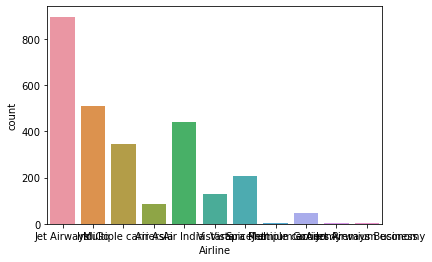

In [70]:
ax=sns.countplot(x='Airline',data=data_test)
print(data_test['Airline'].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


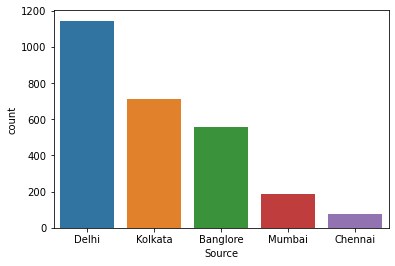

In [71]:
ax=sns.countplot(x='Source',data=data_test)
print(data_test['Source'].value_counts())

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


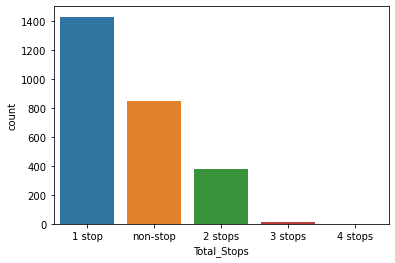

In [72]:
ax=sns.countplot(x='Total_Stops',data=data_test)
print(data_test['Total_Stops'].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


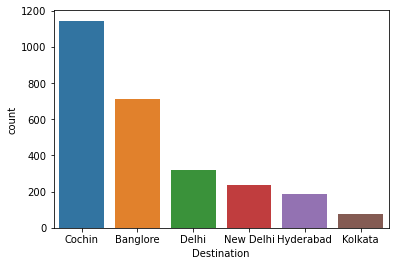

In [73]:
ax=sns.countplot(x='Destination',data=data_test)
print(data_test['Destination'].value_counts())

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
CCU → DEL → COK → TRV → BLR      1
BOM → VGA → TIR → HYD            1
BLR → BOM → IDR → DEL            1
BOM → AMD → ISK → HYD            1
BLR → BOM → UDR → DEL            1
Name: Route, Length: 100, dtype: int64


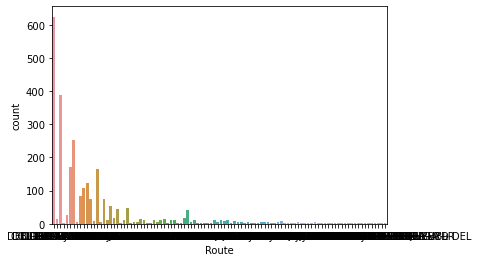

In [74]:
ax=sns.countplot(x='Route',data=data_test)
print(data_test['Route'].value_counts())

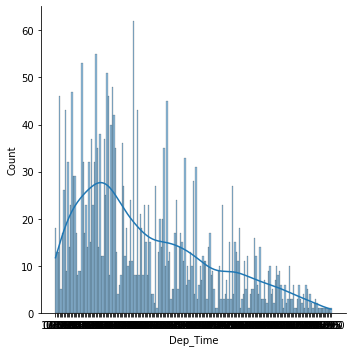

In [75]:
sns.displot(data_test['Dep_Time'],kde=True)

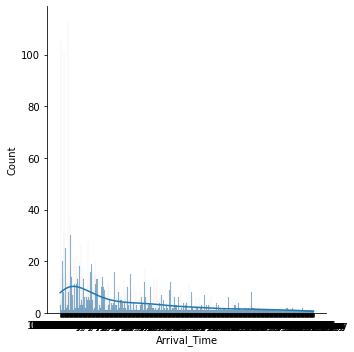

In [76]:
sns.displot(data_test['Arrival_Time'],kde=True)

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64


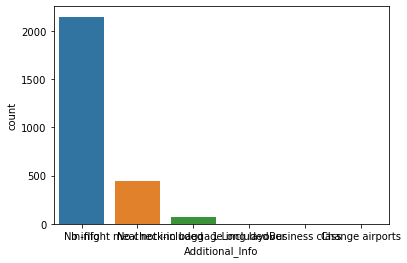

In [77]:
ax=sns.countplot(x='Additional_Info',data=data_test)
print(data_test['Additional_Info'].value_counts())

### Encoding the dataset

In [79]:
for i in data_test.columns:
    if data_test[i].dtypes=="object":
        data_test[i]=enc.fit_transform(data_test[i].values.reshape(-1,1))

In [80]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,138.0,150.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,31.0,353.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,156.0,566.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,48.0,633.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,198.0,135.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,170.0,617.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,106.0,507.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,183.0,151.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,11.0,577.0,60.0,0.0,5.0


### Removing the columns which has very less relation with the target variable

In [81]:
data_test_new=data_test.drop(columns=['Dep_Time','Arrival_Time'])

In [82]:
data_test_new

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,4.0,39.0,2.0,1.0,76.0,10.0,0.0,5.0
1,3.0,10.0,3.0,0.0,65.0,248.0,0.0,5.0
2,4.0,22.0,2.0,1.0,76.0,148.0,0.0,3.0
3,6.0,22.0,2.0,1.0,76.0,36.0,0.0,5.0
4,0.0,27.0,0.0,2.0,16.0,216.0,4.0,5.0
...,...,...,...,...,...,...,...,...
2666,1.0,39.0,3.0,0.0,51.0,150.0,0.0,5.0
2667,3.0,28.0,3.0,0.0,43.0,213.0,4.0,5.0
2668,4.0,36.0,2.0,1.0,76.0,278.0,0.0,5.0
2669,1.0,36.0,2.0,1.0,76.0,60.0,0.0,5.0


### Scaling the data

In [83]:
sc=StandardScaler()
data_test_new_scaled=sc.fit_transform(data_test_new)

### Exporting the file which has price list

In [88]:
price=pd.read_excel('Sample_submission.xlsx')

In [89]:
price

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


### Linear Regression

In [93]:
LR_pred=LR.predict(data_test_new_scaled)
print(r2_score(price,LR_pred))

-5.16031904216716


### Lasso Regression

In [96]:
ls_pred=ls.predict(data_test_new_scaled)
lss=r2_score(price,ls_pred)
lss

-5.159978372892133

### Ridge Regression

In [97]:
Rg_pred=Rgg.predict(data_test_new_scaled)
Rgs=r2_score(price,Rg_pred)
Rgs

-5.159713865585761

### Ensemble Technique

In [98]:
rf_pred=rf.predict(data_test_new_scaled)
rfs=r2_score(price,rf_pred)
rfs

-5.460050691337941

### Saving the model

In [99]:
import pickle
filename='Flight.pkl'
pickle.dump(rf,open(filename,'wb'))

### Documentation

In [ ]:
Import the csv file then seen the data and check the shape of the dataset.
After that we check for empty and 0 values and we found none of them in the columns.
After that visualization of the dataset is done.
After that we check for outliers and we found some but we did not remove them since them since these are the possible outcomes.
After that we check for correlation with the target variable and remove columns ['Dep_Time','Arrival_Time']) as they have less relation with the target variable.
After that we check for skewness and we found it but we did not remove it since the columns which have skewness are categorical columns.
After that we check for multicollinearity and we did not found it.
Then we train the dataset with the several algo .
And the we import test data file and above steps are performed .
But not able to predict the price properly.
After that we save the model.